**Table of Contents**
1. [Basic Analysis](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Import_and_Basic_Analysis)
    * [Imports](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Imports)
    * [Basic Analysis](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Basic_Analysis)
2. [Data Visualisation](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Visual_analysis)
    * [Overview of data](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Overview_of_data)
    * [Analysis of pokémon types](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Analysis_of_pok_mon_types)
    * [Analysis of generations](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Analysis_of_generations)
    * [Conclusion](https://colab.research.google.com/drive/1sZF_WxHdt_hS4X3V6Ze1JyvvCrp2u5vF?authuser=1#scrollTo=Conclusion)


#**Import and Basic Analysis**


##Imports

In [ ]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import pandas as pd
import numpy as np
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['Pokemon.csv']))
data.head(5)

Saving Pokemon.csv to Pokemon (1).csv


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


##Basic Analysis

**Features / Data Dictionary**
- \#ID: The number ID corresponding to the pokémon
- Name: Name of the pokémon
- Type 1: the type characteristic determines strengths and weaknesses to other types 
- Type 2: determines more strengths and weaknesses to other types 
- Total: sum of all stats of the pokémon 
- HP: Hit points show how much damage a pokémon can take before before being taken out of the battle
- Attack: the base modifier for normal attacks
- Defense: the base damage resistance against normal attacks
- SP Atk: the base modifier for special attacks
- SP Def: the base damage resistance against special attacks
- Speed: determines which pokemon attacks first each round in the battle 
- Generation: Releses of Pokemon
  1. Red and Blue (1996–1999),
  2. Gold and Silver (1999–2002),
  3. Ruby and Sapphire (2002–2006),
  4. Diamond and Pearl(2006–2010),
  5. Black And White (2010–2013),
  6. X and Y (2013–2016)
- Legendary: if pokémon is a legendary or not.

In [ ]:
data.shape

(800, 13)

In [ ]:
data.columns


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary',
       'Combinations'],
      dtype='object')

In [ ]:
data.info

<bound method DataFrame.info of        #                   Name   Type 1  ... Speed  Generation  Legendary
0      1              Bulbasaur    Grass  ...    45           1      False
1      2                Ivysaur    Grass  ...    60           1      False
2      3               Venusaur    Grass  ...    80           1      False
3      3  VenusaurMega Venusaur    Grass  ...    80           1      False
4      4             Charmander     Fire  ...    65           1      False
..   ...                    ...      ...  ...   ...         ...        ...
795  719                Diancie     Rock  ...    50           6       True
796  719    DiancieMega Diancie     Rock  ...   110           6       True
797  720    HoopaHoopa Confined  Psychic  ...    70           6       True
798  720     HoopaHoopa Unbound  Psychic  ...    80           6       True
799  721              Volcanion     Fire  ...    70           6       True

[800 rows x 13 columns]>

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

#                 0
Name              0
Type 1            0
Type 2          375
Total             0
HP                0
Attack            0
Defense           0
Sp. Atk           0
Sp. Def           0
Speed             0
Generation        0
Legendary         0
Combinations    375
dtype: int64

Not all pokémon have a type 2 thus it is left blank in some instances 

#**Visual analysis** 

## Overview of data

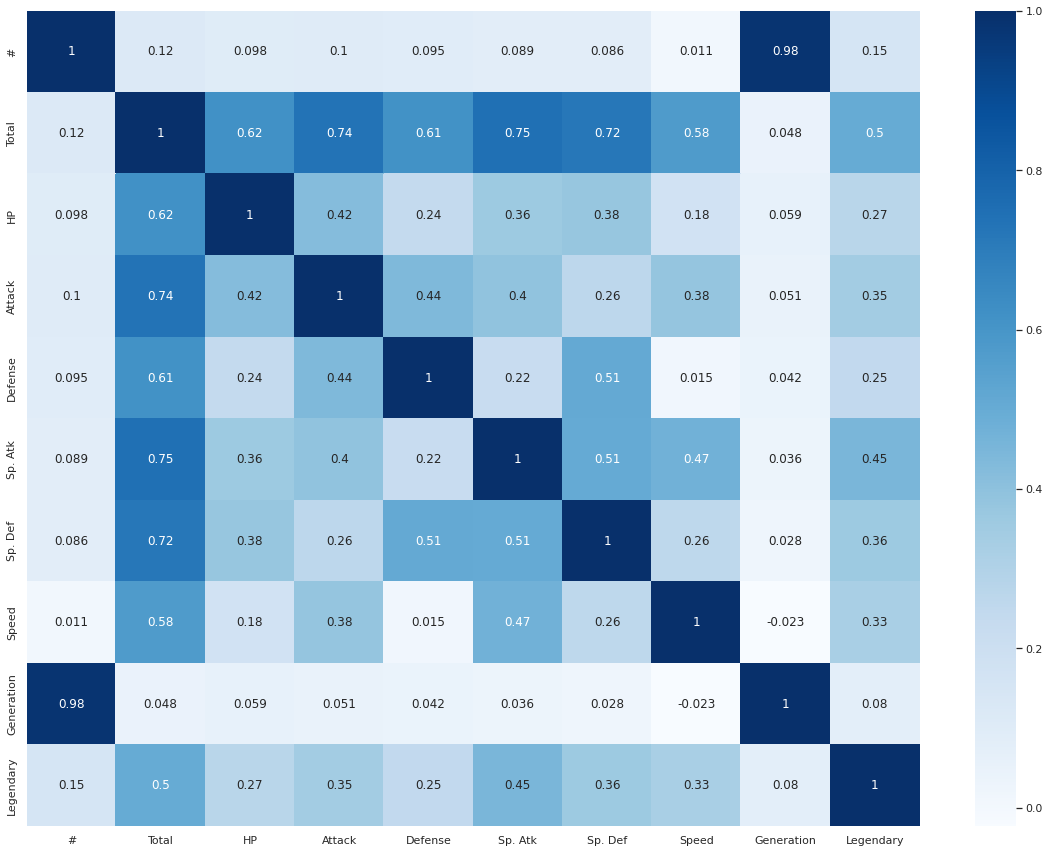

In [ ]:
f, ax = plt.subplots(0,0,figsize=(20,15))
ax = sns.heatmap(data.corr(), annot = True, cmap = 'Blues') #data.corr() used to make correlation matrix

plt.show()

This chart shows the general correlations of the data

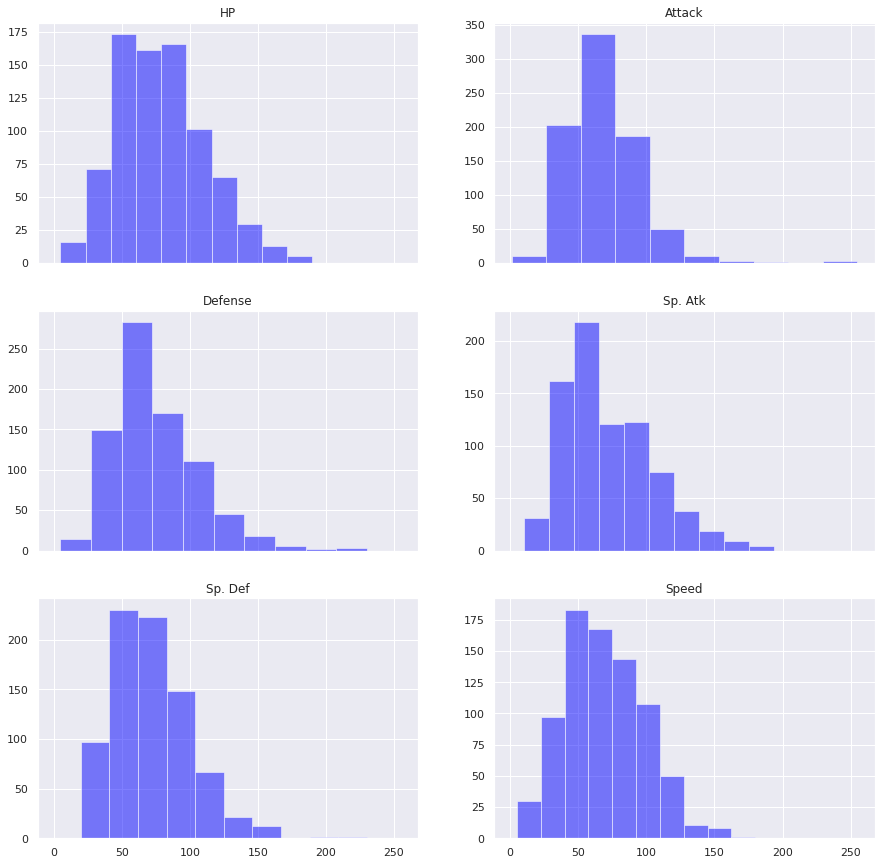

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, figsize=(15,15))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
dfs = [data['Attack'],
       data['HP'],
       data['Defense'],
       data['Sp. Atk'],
       data['Sp. Def'],
       data['Speed']]
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total"]

for n in range(len(axs)):
    axs[n].hist(dfs[n], facecolor='blue', alpha=0.5)
    axs[n].set_title(stats[n])
plt.show()

This gives an overview of what the general numbers are for each stat

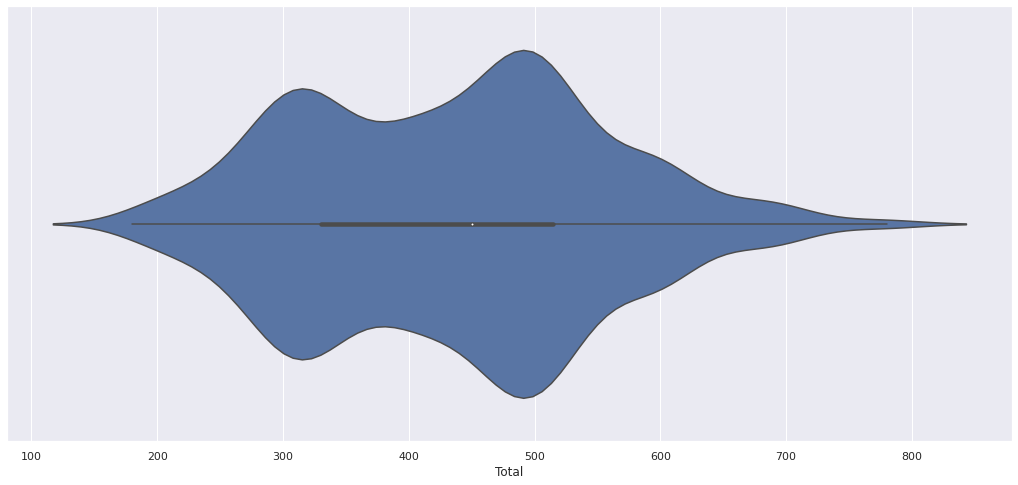

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.violinplot(x = data['Total'], data = data)


This shows a overview of how powerful pokémon are generally

## Analysis of pokémon types

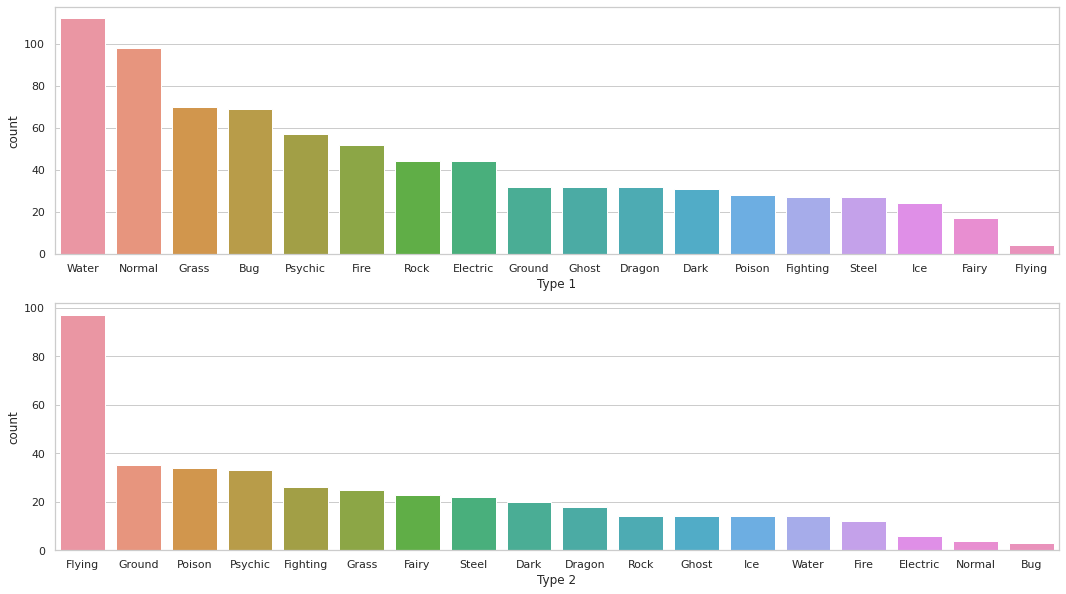

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(2,1, figsize = (18,10)) #making 2 count plots 

sns.countplot(x = 'Type 1', data = data, order = data['Type 1'].value_counts().index ,ax = ax[0] )
sns.countplot(x = 'Type 2', data = data, order = data['Type 2'].value_counts().index ,ax = ax[1] )

plt.show()


This chart shows the prevalence of the different types

In [ ]:
# Creating new column for df as "Type Combination"
data_n = data.copy()
data_n['Combinations'] = (data_n['Type 1'] + "+" + data_n['Type 2'])
data_n['Combinations'].nunique()

136

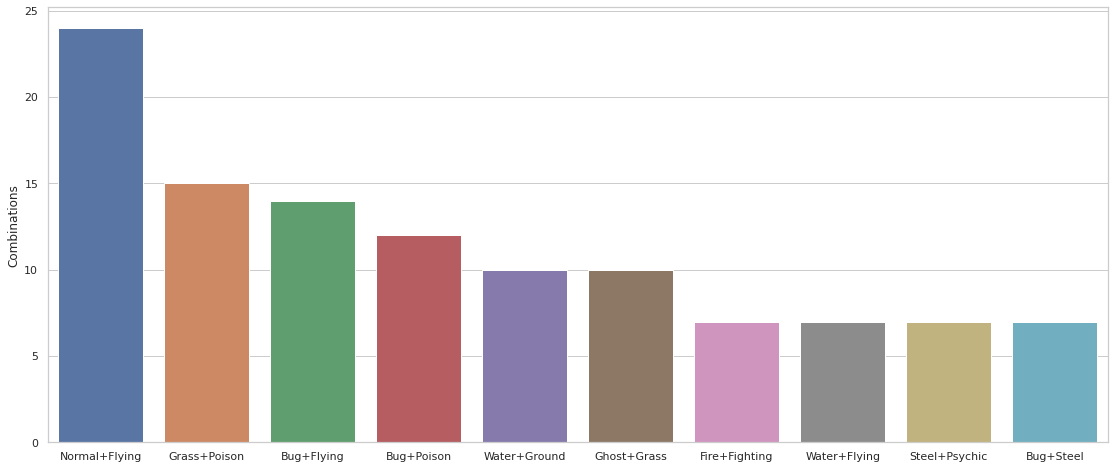

In [ ]:
# visualize top 10 common combinations
fig, ax = plt.subplots(figsize=(19, 8))
top10 = data_n['Combinations'].value_counts()[0:10]
ax = sns.barplot(x=top10.index, y=top10)

This shows the commonality of the diffreant combonations of types a pokémon can have.

##Analysis of generations 

Generation
1    151
2     99
3    138
4    116
5    164
6     81
Name: Name, dtype: int64

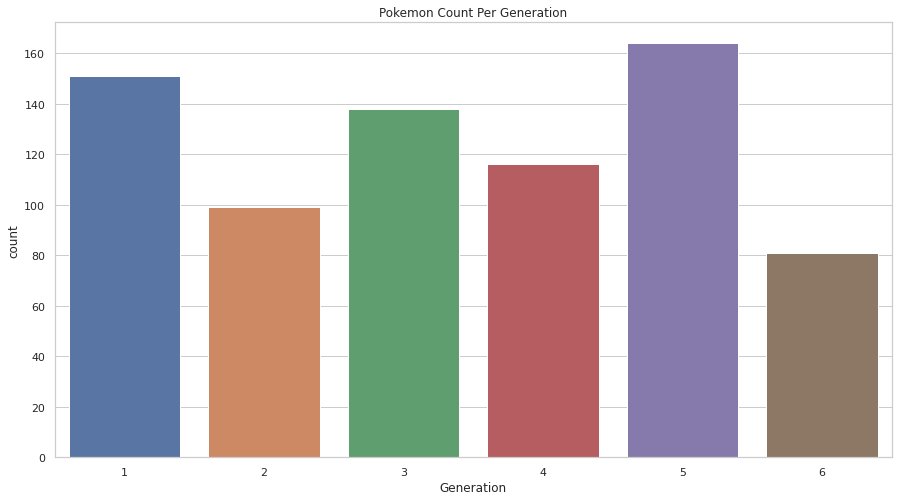

In [ ]:
data = data.loc[~data['Name'].str.contains('Mega') & ~data['Name'].str.contains('Primal')] #not counting Mega or Primal forms
plt.figure(figsize = (15,8))
plt.title('Pokemon Count Per Generation')
sns.set_theme(style="whitegrid")
sns.countplot(data = data_n , x = 'Generation')

data_n.groupby('Generation').Name.count()

The largest genaration apears to be the 5th genetation and the smallest is the 6th. On agrage there is 125 pokémon released per genetation.

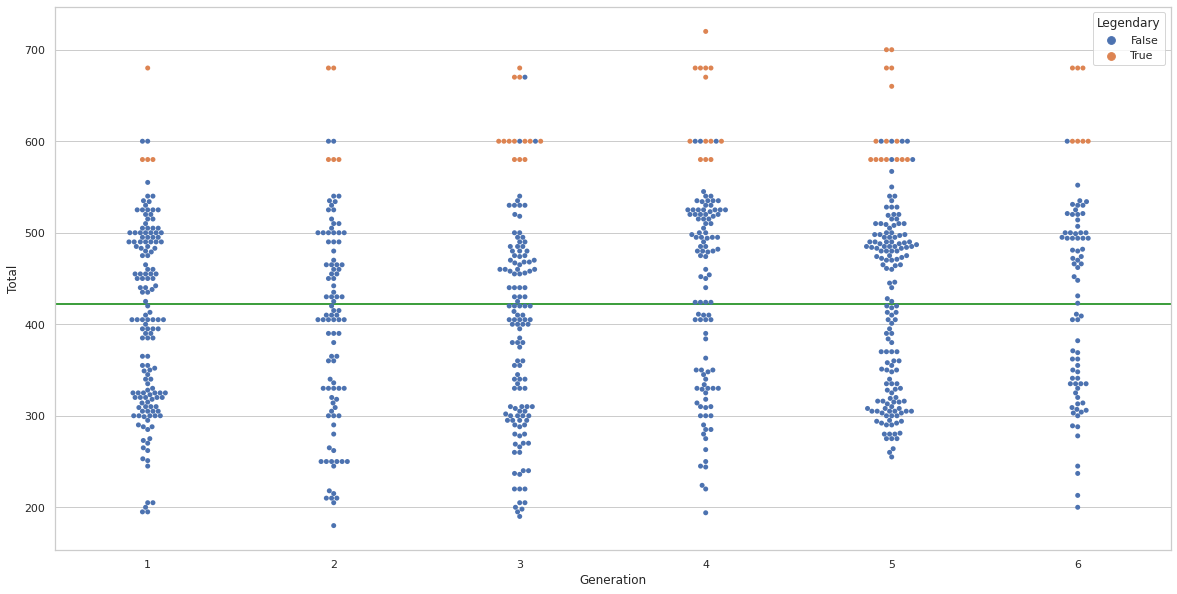

In [ ]:
f, ax = plt.subplots(0,0, figsize = (20,10))
ax = sns.swarmplot(data = data, x = 'Generation', y= 'Total', hue = 'Legendary')

plt.axhline(data['Total'].mean(), color = 'green') #giving a straight line on mean

plt.show()

This shows an overview of how good pokémon are in the contexts of what generation they are in and if they are considered legendary meaning they are rarer in the game.

---
##Conclusion
This concludes my analysis of pokémon. I hope that my charts have shown a brief but enlightening look at different aspects of pokémon and popular trends surrounding them.